# Proyek Analisis Data: Nama dataset
- Nama: Anindy Bahri
- Email: anindibahri22@gmail.com
- Id Dicoding: anindy_bahri_tnne

## Menentukan Pertanyaan Bisnis

- Bagaimana peningkatan PM2.5 dan CO didaerah Gucheng mulai dari ahun 2013-2017?
- Bagaimana Peningkatan O3 didaerah Gucheng dari tahun 2013 sampai 2017?

## Menyaipkan semua library yang dibuthkan

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st 

## Data Wrangling

### Gathering Data

In [36]:
airquality_df = pd.read_csv ('PRSA_Data_Gucheng_20130301-20170228.csv')
airquality_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


### Assessing Data

Menampilkan tipe data

In [37]:
airquality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [38]:
airquality_df.value_counts(dropna=False)

No     year  month  day  hour  PM2.5  PM10   SO2   NO2   CO      O3     TEMP  PRES    DEWP   RAIN  wd   WSPM  station
1      2013  3      1    0     6.0    18.0   5.0   NaN   800.0   88.0   0.1   1021.1  -18.6  0.0   NW   4.4   Gucheng    1
23379  2015  10     31   2     62.0   169.0  4.0   47.0  1200.0  2.0    3.5   1025.3  -0.7   0.0   NNW  0.5   Gucheng    1
23373  2015  10     30   20    55.0   126.0  6.0   67.0  800.0   5.0    8.3   1023.1  -1.5   0.0   W    0.6   Gucheng    1
23374  2015  10     30   21    98.0   173.0  6.0   71.0  1100.0  3.0    6.2   1023.5  -0.5   0.0   W    0.5   Gucheng    1
23375  2015  10     30   22    66.0   139.0  5.0   66.0  1400.0  2.0    5.2   1024.0  -0.6   0.0   W    0.5   Gucheng    1
                                                                                                                        ..
11683  2014  6      30   18    67.0   111.0  11.0  21.0  800.0   243.0  32.8  996.5    14.4  0.0   S    1.4   Gucheng    1
11682  2014  6      3

In [39]:
airquality_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,34905,35022.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,Gucheng
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3949,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,NaN,1.343310,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,NaN,1.151064,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,NaN,0.600000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,NaN,1.000000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,NaN,1.800000,NaN


Pengecekan Missing Value Pada Data

In [40]:
airquality_df.isna()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35060,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35061,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
35062,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
airquality_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

Pengecekan Data Duplikat

In [42]:
airquality_df.duplicated().sum()
print('Jumlah duplikasi:',airquality_df.duplicated().sum())

Jumlah duplikasi: 0


In [43]:
airquality_df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,34905,35022.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,Gucheng
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3949,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,NaN,1.343310,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,NaN,1.151064,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,NaN,0.600000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,NaN,1.000000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,NaN,1.800000,NaN


### Cleaning Data

Pembersihan Missing Value

In [44]:
airquality_df=airquality_df.fillna(method='bfill').fillna(method='ffill')

C:\Users\NINDY\AppData\Local\Temp\ipykernel_4492\2673646422.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  airquality_df=airquality_df.fillna(method='bfill').fillna(method='ffill')


In [45]:
airquality_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [46]:
airquality_df['datetime'] = airquality_df['year'].astype(str) + '-' + airquality_df['month'].astype(str) + '-' + airquality_df['day'].astype(str) + ' ' + airquality_df['hour'].astype(str) + ':00:00'

In [47]:
airquality_df.head(30)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,6.0,18.0,5.0,5.0,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng,2013-3-1 0:00:00
1,2,2013,3,1,1,6.0,15.0,5.0,5.0,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng,2013-3-1 1:00:00
2,3,2013,3,1,2,5.0,18.0,6.0,5.0,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng,2013-3-1 2:00:00
3,4,2013,3,1,3,6.0,20.0,6.0,5.0,600.0,73.0,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng,2013-3-1 3:00:00
4,5,2013,3,1,4,5.0,17.0,5.0,5.0,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng,2013-3-1 4:00:00
5,6,2013,3,1,5,4.0,11.0,3.0,5.0,700.0,87.0,-1.8,1023.6,-21.9,0.0,E,1.2,Gucheng,2013-3-1 5:00:00
6,7,2013,3,1,6,3.0,6.0,3.0,5.0,700.0,92.0,-2.6,1024.3,-20.4,0.0,ENE,1.2,Gucheng,2013-3-1 6:00:00
7,8,2013,3,1,7,5.0,5.0,3.0,5.0,800.0,86.0,-0.9,1025.6,-20.5,0.0,ENE,1.1,Gucheng,2013-3-1 7:00:00
8,9,2013,3,1,8,5.0,9.0,5.0,5.0,900.0,81.0,0.1,1026.1,-20.3,0.0,ENE,3.0,Gucheng,2013-3-1 8:00:00
9,10,2013,3,1,9,4.0,10.0,6.0,5.0,900.0,82.0,1.1,1026.1,-20.6,0.0,NE,2.8,Gucheng,2013-3-1 9:00:00


In [48]:
column_to_move = airquality_df.pop('datetime')
airquality_df.insert(1,'datetime', column_to_move)

In [49]:
airquality_df.head(20)

,No,datetime,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013-3-1 0:00:00,2013,3,1,0,6.0,18.0,5.0,5.0,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013-3-1 1:00:00,2013,3,1,1,6.0,15.0,5.0,5.0,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013-3-1 2:00:00,2013,3,1,2,5.0,18.0,6.0,5.0,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013-3-1 3:00:00,2013,3,1,3,6.0,20.0,6.0,5.0,600.0,73.0,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013-3-1 4:00:00,2013,3,1,4,5.0,17.0,5.0,5.0,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng
5,6,2013-3-1 5:00:00,2013,3,1,5,4.0,11.0,3.0,5.0,700.0,87.0,-1.8,1023.6,-21.9,0.0,E,1.2,Gucheng
6,7,2013-3-1 6:00:00,2013,3,1,6,3.0,6.0,3.0,5.0,700.0,92.0,-2.6,1024.3,-20.4,0.0,ENE,1.2,Gucheng
7,8,2013-3-1 7:00:00,2013,3,1,7,5.0,5.0,3.0,5.0,800.0,86.0,-0.9,1025.6,-20.5,0.0,ENE,1.1,Gucheng
8,9,2013-3-1 8:00:00,2013,3,1,8,5.0,9.0,5.0,5.0,900.0,81.0,0.1,1026.1,-20.3,0.0,ENE,3.0,Gucheng
9,10,2013-3-1 9:00:00,2013,3,1,9,4.0,10.0,6.0,5.0,900.0,82.0,1.1,1026.1,-20.6,0.0,NE,2.8,Gucheng


In [50]:
airquality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        35064 non-null  int64  
 1   datetime  35064 non-null  object 
 2   year      35064 non-null  int64  
 3   month     35064 non-null  int64  
 4   day       35064 non-null  int64  
 5   hour      35064 non-null  int64  
 6   PM2.5     35064 non-null  float64
 7   PM10      35064 non-null  float64
 8   SO2       35064 non-null  float64
 9   NO2       35064 non-null  float64
 10  CO        35064 non-null  float64
 11  O3        35064 non-null  float64
 12  TEMP      35064 non-null  float64
 13  PRES      35064 non-null  float64
 14  DEWP      35064 non-null  float64
 15  RAIN      35064 non-null  float64
 16  wd        35064 non-null  object 
 17  WSPM      35064 non-null  float64
 18  station   35064 non-null  object 
dtypes: float64(11), int64(5), object(3)
memory usage: 5.1+ MB


Merubah tipe data menjadi datetime

In [51]:
airquality_df['datetime'] = pd.to_datetime(airquality_df['datetime'])

In [52]:
airquality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        35064 non-null  int64         
 1   datetime  35064 non-null  datetime64[ns]
 2   year      35064 non-null  int64         
 3   month     35064 non-null  int64         
 4   day       35064 non-null  int64         
 5   hour      35064 non-null  int64         
 6   PM2.5     35064 non-null  float64       
 7   PM10      35064 non-null  float64       
 8   SO2       35064 non-null  float64       
 9   NO2       35064 non-null  float64       
 10  CO        35064 non-null  float64       
 11  O3        35064 non-null  float64       
 12  TEMP      35064 non-null  float64       
 13  PRES      35064 non-null  float64       
 14  DEWP      35064 non-null  float64       
 15  RAIN      35064 non-null  float64       
 16  wd        35064 non-null  object        
 17  WSPM      35

In [53]:
airquality_df.describe(include='all')

,No,datetime,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,Gucheng
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3961,NaN,35064
mean,17532.500000,2015-03-01 11:30:00,2014.662560,6.522930,15.729637,11.500000,83.804401,119.194128,15.391560,55.850474,1323.498175,57.297437,13.855961,1008.835547,2.600245,0.064374,NaN,1.343925,NaN
min,1.000000,2013-03-01 00:00:00,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014-03-01 05:45:00,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-9.000000,0.000000,NaN,0.600000,NaN
50%,17532.500000,2015-03-01 11:30:00,2015.000000,7.000000,16.000000,11.500000,59.500000,99.000000,7.000000,50.000000,1000.000000,44.000000,14.800000,1008.500000,3.000000,0.000000,NaN,1.000000,NaN
75%,26298.250000,2016-02-29 17:15:00,2016.000000,10.000000,23.000000,17.250000,115.000000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,NaN,1.800000,NaN
max,35064.000000,2017-02-28 23:00:00,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,NaN,12.000000,NaN


## Exploratory Data Analysis (EDA)

### Explore ...

In [54]:
airquality_df.describe(include="all")
airquality_df.head(10)

,No,datetime,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013-03-01 00:00:00,2013,3,1,0,6.0,18.0,5.0,5.0,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013-03-01 01:00:00,2013,3,1,1,6.0,15.0,5.0,5.0,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013-03-01 02:00:00,2013,3,1,2,5.0,18.0,6.0,5.0,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013-03-01 03:00:00,2013,3,1,3,6.0,20.0,6.0,5.0,600.0,73.0,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013-03-01 04:00:00,2013,3,1,4,5.0,17.0,5.0,5.0,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng
5,6,2013-03-01 05:00:00,2013,3,1,5,4.0,11.0,3.0,5.0,700.0,87.0,-1.8,1023.6,-21.9,0.0,E,1.2,Gucheng
6,7,2013-03-01 06:00:00,2013,3,1,6,3.0,6.0,3.0,5.0,700.0,92.0,-2.6,1024.3,-20.4,0.0,ENE,1.2,Gucheng
7,8,2013-03-01 07:00:00,2013,3,1,7,5.0,5.0,3.0,5.0,800.0,86.0,-0.9,1025.6,-20.5,0.0,ENE,1.1,Gucheng
8,9,2013-03-01 08:00:00,2013,3,1,8,5.0,9.0,5.0,5.0,900.0,81.0,0.1,1026.1,-20.3,0.0,ENE,3.0,Gucheng
9,10,2013-03-01 09:00:00,2013,3,1,9,4.0,10.0,6.0,5.0,900.0,82.0,1.1,1026.1,-20.6,0.0,NE,2.8,Gucheng


In [55]:
airquality_df.groupby(by='datetime').agg({
    'datetime' : 'max',
    'PM2.5'    : 'mean',
    'CO'       : 'mean',
    'station'  : 'min'
    
})


,datetime,PM2.5,CO,station
datetime,,,,
2013-03-01 00:00:00,2013-03-01 00:00:00,6.0,800.0,Gucheng
2013-03-01 01:00:00,2013-03-01 01:00:00,6.0,800.0,Gucheng
2013-03-01 02:00:00,2013-03-01 02:00:00,5.0,700.0,Gucheng
2013-03-01 03:00:00,2013-03-01 03:00:00,6.0,600.0,Gucheng
2013-03-01 04:00:00,2013-03-01 04:00:00,5.0,600.0,Gucheng
...,...,...,...,...
2017-02-28 19:00:00,2017-02-28 19:00:00,14.0,500.0,Gucheng
2017-02-28 20:00:00,2017-02-28 20:00:00,27.0,700.0,Gucheng
2017-02-28 21:00:00,2017-02-28 21:00:00,22.0,600.0,Gucheng


In [56]:
g1 = airquality_df.groupby(['year','month']).agg({
    'datetime' : 'max',
    'PM2.5'    : 'mean',
    'CO'       : 'mean',
    'station'  : 'min'

})
g1

datetime       PM2.5           CO  station
year month                                                      
2013 3     2013-03-31 23:00:00  108.841398  1608.688172  Gucheng
     4     2013-04-30 23:00:00   63.979167   912.008333  Gucheng
     5     2013-05-31 23:00:00   82.168011  1020.086022  Gucheng
     6     2013-06-30 23:00:00   99.059722  1439.448611  Gucheng
     7     2013-07-31 23:00:00   62.001344   974.987903  Gucheng
     8     2013-08-31 23:00:00   58.631720   903.629032  Gucheng
     9     2013-09-30 23:00:00   80.279167  1186.655556  Gucheng
     10    2013-10-31 23:00:00   95.950269  1331.317204  Gucheng
     11    2013-11-30 23:00:00   77.234722  1541.250000  Gucheng
     12    2013-12-31 23:00:00   81.302419  1832.930108  Gucheng
2014 1     2014-01-31 23:00:00  102.876344  2660.483871  Gucheng
     2     2014-02-28 23:00:00  156.508929  2472.619048  Gucheng
     3     2014-03-31 23:00:00   99.973118  1686.424731  Gucheng
     4     2014-04-30 23:00:00   99.116667  1049.444444  Gucheng
     5     2014-05-31 23:00:00   69.817742   887.903226  Gucheng
     6     2014-06-30 23:00:00   56.773611   831.944444  Gucheng
     7     2014-07-31 23:00:00   90.475806   910.618280  Gucheng
     8     2014-08-31 23:00:00   65.014651   833.870968  Gucheng
     9     2014-09-30 23:00:00   72.049583   988.055556  Gucheng
     10    2014-10-31 23:00:00  124.526882  1421.908602  Gucheng
     11    2014-11-30 23:00:00   90.242778  1797.638889  Gucheng
     12    2014-12-31 23:00:00   59.504704  1792.069892  Gucheng
2015 1     2015-01-31 23:00:00   95.221237  2069.758065  Gucheng
     2     2015-02-28 23:00:00   95.229167  1609.970238  Gucheng
     3     2015-03-31 23:00:00   88.023656  1313.978495  Gucheng
     4     2015-04-30 23:00:00   71.856944   804.166667  Gucheng
     5     2015-05-31 23:00:00   57.961022   710.215054  Gucheng
     6     2015-06-30 23:00:00   62.850000  1144.166667  Gucheng
     7     2015-07-31 23:00:00   61.553763   669.623656  Gucheng
     8     2015-08-31 23:00:00   46.103495   799.327957  Gucheng
     9     2015-09-30 23:00:00   49.577778   696.388889  Gucheng
     10    2015-10-31 23:00:00   77.672043   947.043011  Gucheng
     11    2015-11-30 23:00:00  131.372222  1950.277778  Gucheng
     12    2015-12-31 23:00:00  165.284946  3182.795699  Gucheng
2016 1     2016-01-31 23:00:00   76.360215  1715.591398  Gucheng
     2     2016-02-29 23:00:00   43.795977  1005.890805  Gucheng
     3     2016-03-31 23:00:00   98.870968  1276.075269  Gucheng
     4     2016-04-30 23:00:00   71.887500   767.083333  Gucheng
     5     2016-05-31 23:00:00   59.513441   657.661290  Gucheng
     6     2016-06-30 23:00:00   64.431944   732.083333  Gucheng
     7     2016-07-31 23:00:00   70.392473   819.220430  Gucheng
     8     2016-08-31 23:00:00   48.127688   777.688172  Gucheng
     9     2016-09-30 23:00:00   61.190278   799.305556  Gucheng
     10    2016-10-31 23:00:00   93.178763  1142.204301  Gucheng
     11    2016-11-30 23:00:00  105.222222  1834.444444  Gucheng
     12    2016-12-31 23:00:00  133.842742  2491.129032  Gucheng
2017 1     2017-01-31 23:00:00  126.532258  2280.107527  Gucheng
     2     2017-02-28 23:00:00   71.940476  1274.255952  Gucheng

In [57]:
airquality_df.groupby(by='datetime').agg({
    'datetime' : 'max',
    'O3'       : 'mean',
    'station'  : 'min'
    
})

,datetime,O3,station
datetime,,,
2013-03-01 00:00:00,2013-03-01 00:00:00,88.0,Gucheng
2013-03-01 01:00:00,2013-03-01 01:00:00,88.0,Gucheng
2013-03-01 02:00:00,2013-03-01 02:00:00,52.0,Gucheng
2013-03-01 03:00:00,2013-03-01 03:00:00,73.0,Gucheng
2013-03-01 04:00:00,2013-03-01 04:00:00,73.0,Gucheng
...,...,...,...
2017-02-28 19:00:00,2017-02-28 19:00:00,56.0,Gucheng
2017-02-28 20:00:00,2017-02-28 20:00:00,26.0,Gucheng
2017-02-28 21:00:00,2017-02-28 21:00:00,27.0,Gucheng


In [58]:
g1 = airquality_df.groupby(['year', 'month']).agg({
    'datetime' : 'max',
    'O3'       : 'mean',
    'station'  : 'min'
})
g1

datetime          O3  station
year month                                         
2013 3     2013-03-31 23:00:00   58.929371  Gucheng
     4     2013-04-30 23:00:00   62.464472  Gucheng
     5     2013-05-31 23:00:00   84.523013  Gucheng
     6     2013-06-30 23:00:00   72.018920  Gucheng
     7     2013-07-31 23:00:00   73.210141  Gucheng
     8     2013-08-31 23:00:00   80.954931  Gucheng
     9     2013-09-30 23:00:00   45.861594  Gucheng
     10    2013-10-31 23:00:00   27.553886  Gucheng
     11    2013-11-30 23:00:00   27.064926  Gucheng
     12    2013-12-31 23:00:00   25.781361  Gucheng
2014 1     2014-01-31 23:00:00   31.521505  Gucheng
     2     2014-02-28 23:00:00   32.206845  Gucheng
     3     2014-03-31 23:00:00   46.998656  Gucheng
     4     2014-04-30 23:00:00   65.390278  Gucheng
     5     2014-05-31 23:00:00   84.409274  Gucheng
     6     2014-06-30 23:00:00   97.744444  Gucheng
     7     2014-07-31 23:00:00  101.538978  Gucheng
     8     2014-08-31 23:00:00  103.539113  Gucheng
     9     2014-09-30 23:00:00   40.913889  Gucheng
     10    2014-10-31 23:00:00   27.826613  Gucheng
     11    2014-11-30 23:00:00   24.074722  Gucheng
     12    2014-12-31 23:00:00   27.854301  Gucheng
2015 1     2015-01-31 23:00:00   23.939247  Gucheng
     2     2015-02-28 23:00:00   37.985119  Gucheng
     3     2015-03-31 23:00:00   50.116398  Gucheng
     4     2015-04-30 23:00:00   76.258333  Gucheng
     5     2015-05-31 23:00:00   97.654570  Gucheng
     6     2015-06-30 23:00:00   98.647222  Gucheng
     7     2015-07-31 23:00:00  112.361559  Gucheng
     8     2015-08-31 23:00:00  103.506720  Gucheng
     9     2015-09-30 23:00:00   63.454167  Gucheng
     10    2015-10-31 23:00:00   40.447581  Gucheng
     11    2015-11-30 23:00:00   11.650000  Gucheng
     12    2015-12-31 23:00:00   12.935484  Gucheng
2016 1     2016-01-31 23:00:00   31.638441  Gucheng
     2     2016-02-29 23:00:00   50.650862  Gucheng
     3     2016-03-31 23:00:00   51.915323  Gucheng
     4     2016-04-30 23:00:00   72.520833  Gucheng
     5     2016-05-31 23:00:00  100.055108  Gucheng
     6     2016-06-30 23:00:00  116.498611  Gucheng
     7     2016-07-31 23:00:00  107.924731  Gucheng
     8     2016-08-31 23:00:00   81.443548  Gucheng
     9     2016-09-30 23:00:00   51.372222  Gucheng
     10    2016-10-31 23:00:00   19.244624  Gucheng
     11    2016-11-30 23:00:00   15.712500  Gucheng
     12    2016-12-31 23:00:00   15.370968  Gucheng
2017 1     2017-01-31 23:00:00   25.034946  Gucheng
     2     2017-02-28 23:00:00   33.312500  Gucheng

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana peningkatan PM2.5 dan CO didaerah Gucheng mulai dari tahun 2013-2017?

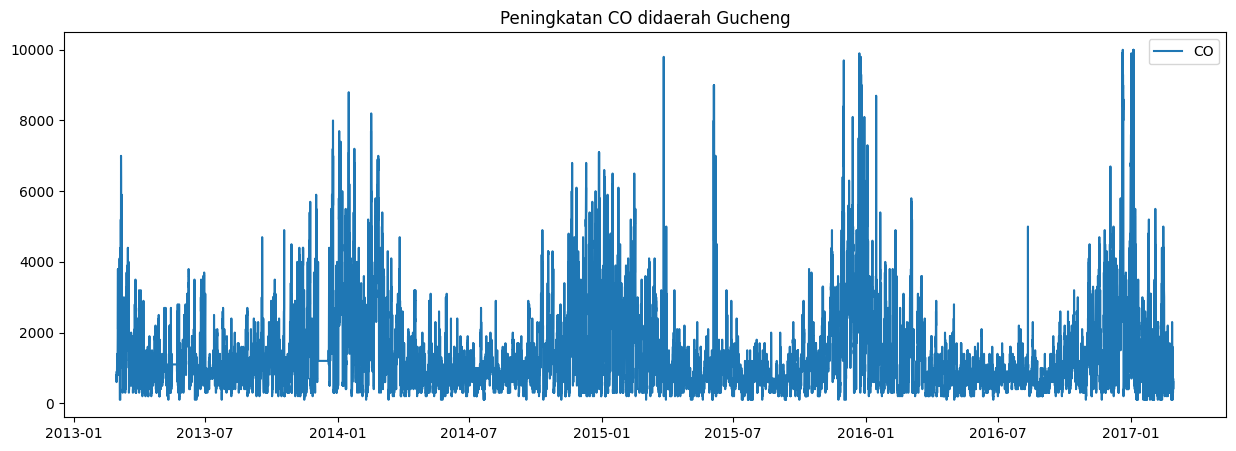

In [59]:
plt.figure(figsize=(15,5))
plt.title('Peningkatan CO didaerah Gucheng')
plt.plot(airquality_df['datetime'], airquality_df['CO'], label='CO')
plt.legend()
plt.show()

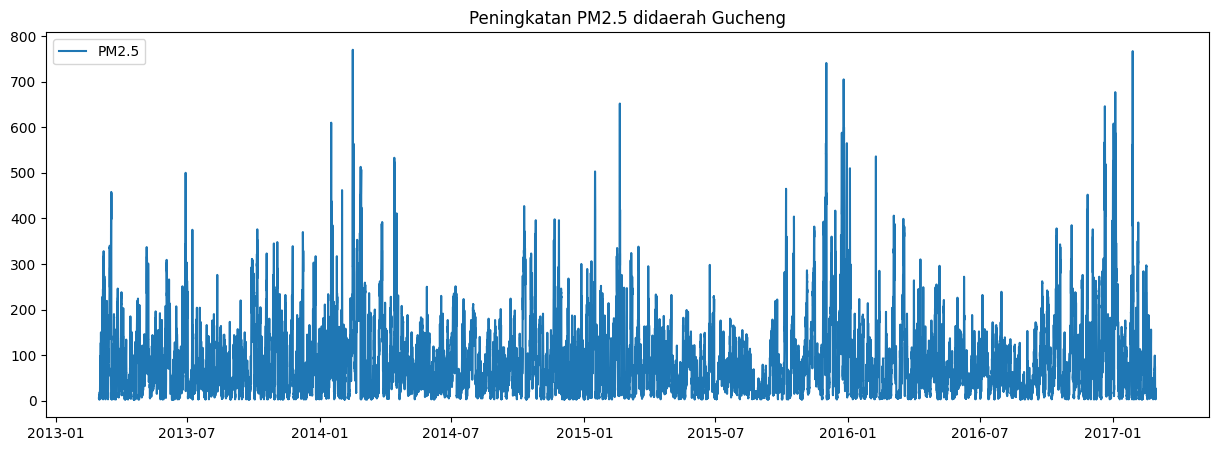

In [60]:
plt.figure(figsize=(15,5))
plt.title('Peningkatan PM2.5 didaerah Gucheng')
plt.plot(airquality_df['datetime'], airquality_df['PM2.5'], label='PM2.5')
plt.legend()
plt.show()

### Pertanyaan 2: Bagaimana Peningkatan O3 didaerah Gucheng dari tahun 2013 sampai 2017?

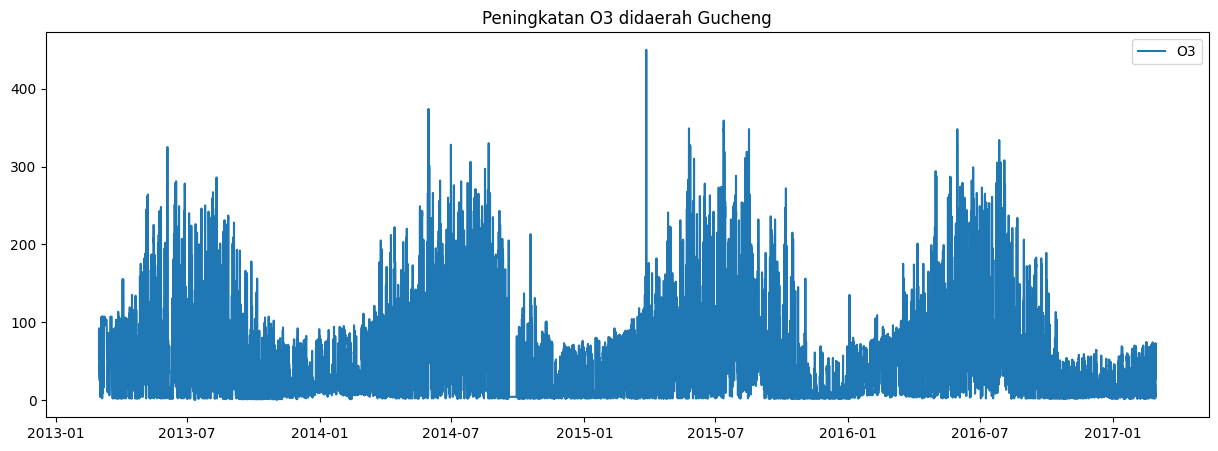

In [61]:
plt.figure(figsize=(15,5))
plt.title('Peningkatan O3 didaerah Gucheng')
plt.plot(airquality_df['datetime'], airquality_df ['O3'], label='O3')
plt.legend()
plt.show()

## Conclusion

- Berdasarkan grafik peningkatan PM2.5 dan CO didaerah Gucheng dari tahun 2013 sampai awal 2017. Kualitas udara yang buruk banyak disebabkan oleh gas gas polusi salah satunya PM2.5 dan CO. PM2.5 sangat berbahaya bagi tubuh karena memiliki partikel yang sangat kecil sehingga bisa masuk kedalam organ tubuh manusia, begitu pula dengan gas CO. Peningkatan PM2.5 berbanding lurus dengan peningkatan gas CO diudara. Tahun 2013 nilai PM2.5 masih di ambang nilai wajar dengan nilai CO yang masih rendah. Berbeda awal tahun 2017 nilai PM2.5 memiliki nilai yang tinggi dibandingkan tahun-tahun sebelumnya. 
- Berdasarkan grafik Peningkatan O3(Ozon) didaerah Gucheng. Awal Tahun 2013 sampai 2014 akhir kandungan O3 diudara pada daerah Gucheng masih dibatas normal, peningkatan setiap bulannya tidak memiliki selisih nilai yang jauh. Namun, tahun 2015 nilai kandungan O3 diudara naik bahkan mencapai nilai tertinggi dibandingkan tahun 2013 dan 2014. Pada tahun 2016 nilai O3 kembali turun dan masih dibatas normal